# Solving the Travelling Salesman Problem using simulated annealing
Authors: Frenk Klein Schiphorst & Nathanyel Schut<br>
Student Numbers: 11866497 & 12907995<br>
Date: 19-12-2022<br>

Dependencies:
- python 3.10.6
- ipython 8.6.0
- matplotlib 3.6.2
- numpy 1.23.4
- pandas 1.5.2
- scipy 1.9.3

In [1]:
import itertools

import cooling_schemes as cs
import util_functions as uf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from IPython.display import clear_output

In [2]:
coord_dict = uf.read_coordinates(r'TSP_problems\a280.tsp.txt')

## Cooling schedules
In this experiment we will investigate the effect of different cooling schedules on the convergence to the optimal configuration. First we investigate which initial temperature is suitable, after which we will test out 2 different cooling schemes.

### Initial temperature
To find the right initial temperature, we will try out lots of different new configurations which have a higher cost than some initial configuration and calculate their acceptance probabilities at a given initial temperature. We will pick the initial temperature for which the average acceptance probability is 'high enough'.

In [5]:
temperatures = np.arange(10000, 27000, 2000)
N = 10000

results_array = np.zeros((len(temperatures), 3))

for i, T in enumerate(temperatures):
    acceptance_probabilities = uf.test_initial_temp(T, coord_dict, N)

    avg_p_accept, std_p_accept = np.mean(acceptance_probabilities), np.std(acceptance_probabilities)
    results_array[i, :] = [T, round(avg_p_accept, 4), round(std_p_accept, 4)]
    
    clear_output(wait=True)
    print(f'Temperature: {T} completed')

Temperature: 26000 completed


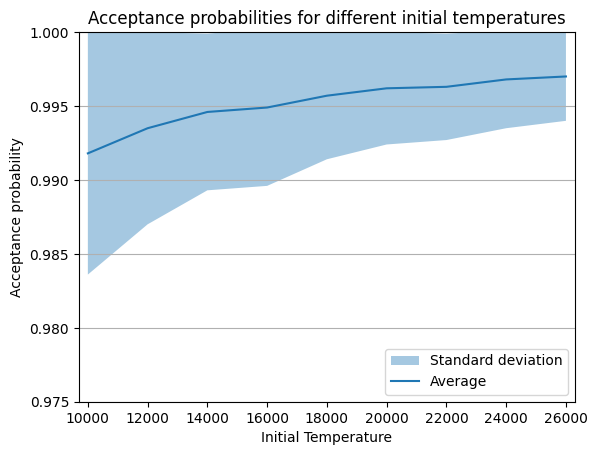

In [6]:
plt.fill_between(results_array[:, 0], results_array[:, 1] - results_array[:, 2], 
                 results_array[:, 1] + results_array[:, 2], alpha=.4,
                 label = 'Standard deviation')
plt.plot(results_array[:, 0], results_array[:, 1], '-', label='Average')
plt.ylim(0.975, 1)
plt.xlim(9700, 26300)
plt.xticks(np.arange(10000, 27000, 2000))

plt.xlabel('Initial Temperature')
plt.ylabel('Acceptance probability')
plt.title('Acceptance probabilities for different initial temperatures')

plt.grid(axis='y')
plt.legend(loc='lower right')
plt.show()

### Testing different cooling schedules
In this section, we will investigate the convergence to a local/global minimum for different cooling schedules. We will test 2 schedules:
- Exponential multiplicative
- Quadratic multiplicative

#### Exponential multplicative cooling

Visual representation of the exponential multiplicative cooling scheme

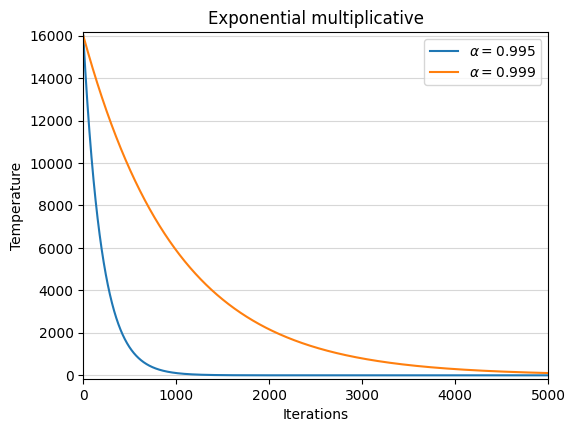

In [7]:
alphas = [0.995, 0.999]
labels = [fr'$\alpha = {alpha}$' for alpha in alphas]

cs.plot_cooling_scheme([cs.exp_mult]*len(alphas), 16000, alphas, 5000, 'Exponential multiplicative', labels, zoom_window=False, zoom_xlim=(0, 2000))

Run the experiment

In [ ]:
alphas_em = [0.995]

costs_em, iterations_em, configs_em = uf.test_cooling_scheme(coord_dict, cs.exp_mult, 16000, alphas_em, 16, 4, max_iterations=60000)

Process to find averages and confidence intervals

In [7]:
avg_costs_em, conf_int_costs_em, last_costs = uf.process_data(costs_em, 0.95)

Save to csv

In [8]:
uf.save_data(alphas_em, avg_costs_em, conf_int_costs_em, 'exp_mult_280')
pd.DataFrame(last_costs.T, columns=map(str, alphas_em)).to_csv('last_costs_em_280.csv', index=False)

Read from the csv files

In [11]:
exp_mult_df = uf.read_data('exp_mult_280.csv')
last_costs_em_df = pd.read_csv('last_costs_em_280.csv')
exp_mult_df

variable,mu_c,CI_c_lower,CI_c_upper
alpha,0.995,0.995,0.995
0,34059.313055,33525.771474,34592.854635
1,34060.689511,33551.785914,34569.593108
2,34069.688322,33549.282986,34590.093658
3,34034.469760,33522.771854,34546.167667
4,34039.619295,33531.315229,34547.923362
...,...,...,...
59995,NaN,NaN,NaN
59996,NaN,NaN,NaN
59997,NaN,NaN,NaN


#### Quadratic multiplicative cooling

Visual representation of the quadratic multiplicative cooling scheme

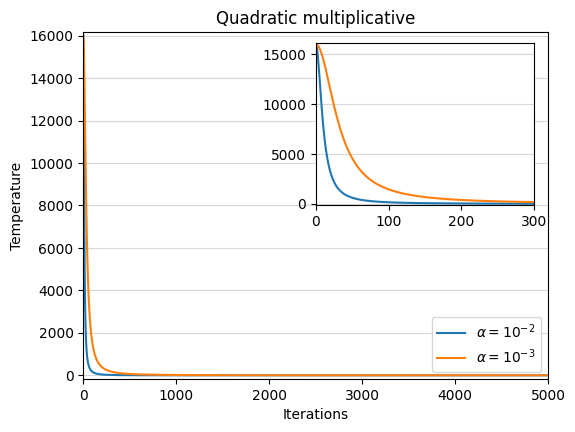

In [10]:
powers = [-2, -3]
alphas_qm = [10**(power) for power in powers]
labels = [fr'$\alpha = 10^{{{power}}}$' for power in powers]

cs.plot_cooling_scheme([cs.quadr_mult]*2, 16000, alphas_qm, 5000, 'Quadratic multiplicative', labels, zoom_window=True, zoom_xlim=(0, 300))

Run the experiment

In [4]:
alphas_qm = [10**(-2)]

costs_qm, iterations_qm, configs_qm = uf.test_cooling_scheme(coord_dict, cs.quadr_mult, 16000, alphas_qm, 16, 4, max_iterations=60000)

4 simulations completed
8 simulations completed
12 simulations completed
16 simulations completed


Process to find averages and confidence intervals

In [5]:
avg_costs_qm, conf_int_costs_qm, last_costs = uf.process_data(costs_qm, 0.95)

Save to csv

In [6]:
uf.save_data(alphas_qm, avg_costs_qm, conf_int_costs_qm, 'quad_mult_280')
pd.DataFrame(last_costs.T, columns=map(str, alphas_qm)).to_csv('last_costs_qm_280.csv', index=False)

Read from the csv files

In [7]:
quad_mult_df = uf.read_data('quad_mult_280.csv')
last_costs_qm_df = pd.read_csv('last_costs_qm_280.csv')
quad_mult_df

variable,mu_c,CI_c_lower,CI_c_upper
alpha,0.01,0.01,0.01
0,34359.247486,34035.698788,34682.796185
1,34337.937567,34024.176161,34651.698973
2,34379.333190,34061.400455,34697.265925
3,34386.678563,34068.949348,34704.407778
4,34400.383348,34068.760374,34732.006322
...,...,...,...
59995,NaN,NaN,NaN
59996,NaN,NaN,NaN
59997,NaN,NaN,NaN


### Comparison

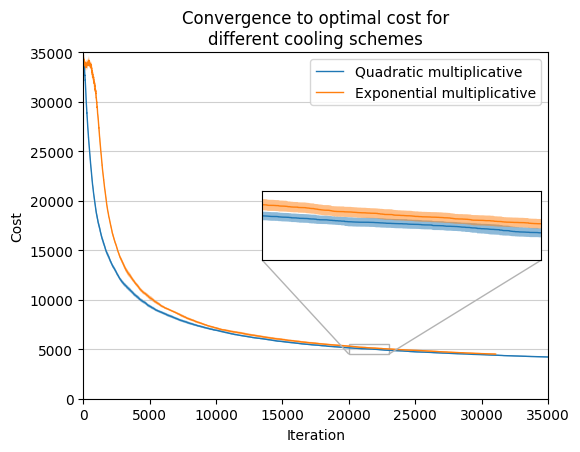

In [61]:
exp_mult_df = uf.read_data('exp_mult_280.csv')
quad_mult_df = uf.read_data('quad_mult_280.csv')
total_df = pd.concat([exp_mult_df, quad_mult_df], axis=1)

labels = ['Quadratic multiplicative', 'Exponential multiplicative']
uf.plot_data(total_df, labels, 'Convergence to optimal cost for\ndifferent cooling schemes', zoom_window=True, zoom=7, zoom_xlim=(20000, 23000), zoom_ylim=(4500, 5500))

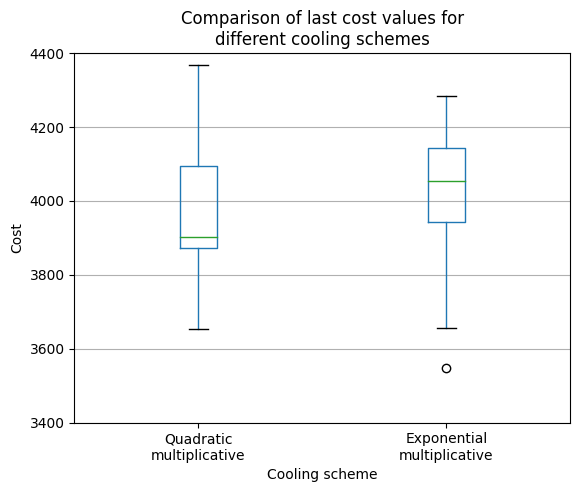

In [62]:
last_costs_qm_df = pd.read_csv('last_costs_qm_280.csv')
last_costs_em_df = pd.read_csv('last_costs_em_280.csv')

total_last_costs_df = pd.concat([last_costs_qm_df, last_costs_em_df], axis=1)
total_last_costs_df.columns = ['Quadratic\nmultiplicative', 'Exponential\nmultiplicative']
total_last_costs_df.boxplot()

plt.grid(axis='x')
plt.ylim(3400, 4400)

plt.xlabel('Cooling scheme')
plt.ylabel('Cost')
plt.title('Comparison of last cost values for\ndifferent cooling schemes')

plt.show()

## Markov Chain Length

In this section we will investigate the effect of different Markov Chain lengths on the convergence to a global/local minimum. We will test a Markov Chain length of 2 and 4, with a quadratic multiplicative cooling scheme, and compare the results to the ones found earlier for a Markov Chain length of 1.

### Markov Chain length = 2

Run the experiment

In [3]:
costs_qm_2, iterations_qm_2, configs_qm_2 = uf.test_cooling_scheme(coord_dict, cs.quadr_mult, 16000, [10**(-2)], 8, 4, mcl=2, max_iterations=60000)

4 simulations completed
8 simulations completed


Process to find averages and confidence intervals

In [4]:
avg_costs_qm_2, conf_int_costs_qm_2, last_costs_qm_2 = uf.process_data(costs_qm_2, 0.95)

Save to csv

In [5]:
alphas_qm_2 = [10**(-2)]

uf.save_data(alphas_qm_2, avg_costs_qm_2, conf_int_costs_qm_2, 'quad_mult_280_mcl=2')
pd.DataFrame(last_costs_qm_2.T, columns=map(str, alphas_qm_2)).to_csv('last_costs_qm_280_mcl=2.csv', index=False)

### Markov Chain length = 4

Run the experiment

In [6]:
costs_qm_4, iterations_qm_4, configs_qm_4 = uf.test_cooling_scheme(coord_dict, cs.quadr_mult, 16000, [10**(-2)], 4, 4, mcl=4, max_iterations=60000)

4 simulations completed


Process to find averages and confidence intervals

In [7]:
avg_costs_qm_4, conf_int_costs_qm_4, last_costs_qm_4 = uf.process_data(costs_qm_4, 0.95)

Save to csv

In [8]:
uf.save_data(alphas_qm_2, avg_costs_qm_4, conf_int_costs_qm_4, 'quad_mult_280_mcl=4')
pd.DataFrame(last_costs_qm_4.T, columns=map(str, alphas_qm_2)).to_csv('last_costs_qm_280_mcl=4.csv', index=False)

### Comparison

Combine datasets into one dataframe

In [3]:
quad_mult_df = uf.read_data('quad_mult_280.csv')
quad_mult_2_df = uf.read_data('quad_mult_280_mcl=2.csv')
quad_mult_4_df = uf.read_data('quad_mult_280_mcl=4.csv')

variable_names = ['mu_c', 'CI_c_lower', 'CI_c_upper']
alpha_1_names = ['0.01 [mcl=1]']
alpha_2_names = ['0.01 [mcl=2]']
alpha_4_names = ['0.01 [mcl=4]']
final_alpha_names = [alpha_1_names[0], alpha_2_names[0], alpha_4_names[0]]

columns_1 = pd.MultiIndex.from_tuples(itertools.product(variable_names, alpha_1_names))
columns_2 = pd.MultiIndex.from_tuples(itertools.product(variable_names, alpha_2_names))
columns_4 = pd.MultiIndex.from_tuples(itertools.product(variable_names, alpha_4_names))
final_columns = pd.MultiIndex.from_tuples(itertools.product(variable_names, final_alpha_names))

quad_mult_df.columns = columns_1
quad_mult_2_df.columns = columns_2
quad_mult_4_df.columns = columns_4

total_df = pd.concat([quad_mult_df, quad_mult_2_df, quad_mult_4_df], axis=1)
total_df = total_df[final_columns]

display(total_df)

mu_c                                CI_c_lower                \
        0.01 [mcl=1]  0.01 [mcl=2]  0.01 [mcl=4]  0.01 [mcl=1]  0.01 [mcl=2]   
0       34359.247486  34904.246881  33725.883683  34035.698788  34419.051555   
1       34337.937567  34827.150030  33779.242984  34024.176161  34317.421587   
2       34379.333190  34852.892388  33749.078363  34061.400455  34342.973980   
3       34386.678563  34796.891784  33863.218151  34068.949348  34241.946945   
4       34400.383348  34810.409384  33970.075250  34068.760374  34275.892911   
...              ...           ...           ...           ...           ...   
239995           NaN           NaN           NaN           NaN           NaN   
239996           NaN           NaN           NaN           NaN           NaN   
239997           NaN           NaN           NaN           NaN           NaN   
239998           NaN           NaN           NaN           NaN           NaN   
239999           NaN           NaN           NaN           NaN           NaN   

                        CI_c_upper                              
        0.01 [mcl=4]  0.01 [mcl=1]  0.01 [mcl=2]  0.01 [mcl=4]  
0       33287.043862  34682.796185  35389.442207  34164.723505  
1       33243.553555  34651.698973  35336.878473  34314.932413  
2       33205.864358  34697.265925  35362.810795  34292.292368  
3       33370.729761  34704.407778  35351.836622  34355.706541  
4       33358.955974  34732.006322  35344.925858  34581.194527  
...              ...           ...           ...           ...  
239995           NaN           NaN           NaN           NaN  
239996           NaN           NaN           NaN           NaN  
239997           NaN           NaN           NaN           NaN  
239998           NaN           NaN           NaN           NaN  
239999           NaN           NaN           NaN           NaN  

[240000 rows x 9 columns]

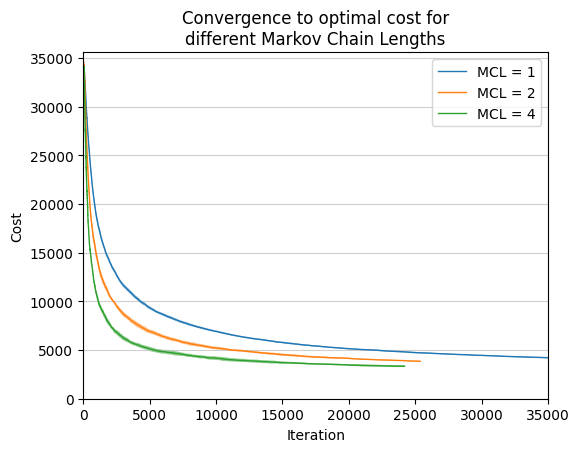

In [4]:
uf.plot_data(total_df, ['MCL = 1', 'MCL = 2', 'MCL = 4'], 'Convergence to optimal cost for\ndifferent Markov Chain Lengths', mcl=[1, 2, 4])

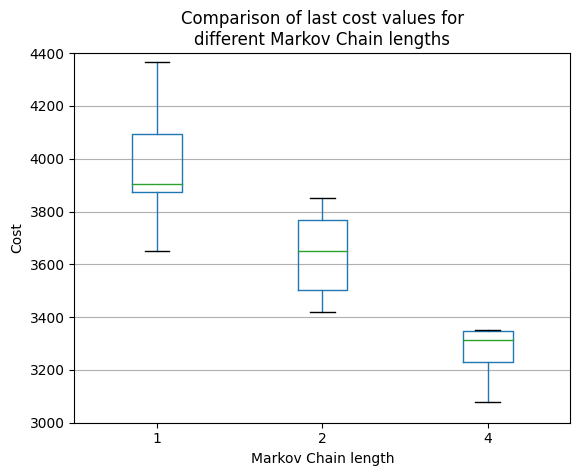

In [21]:
last_costs_qm_1_df = pd.read_csv('last_costs_qm_280.csv')
last_costs_qm_2_df = pd.read_csv('last_costs_qm_280_mcl=2.csv')
last_costs_qm_4_df = pd.read_csv('last_costs_qm_280_mcl=4.csv')

total_last_costs_df = pd.concat([last_costs_qm_1_df, last_costs_qm_2_df, last_costs_qm_4_df], axis=1)
total_last_costs_df.columns = ['1', '2', '4']
total_last_costs_df.boxplot()

plt.grid(axis='x')
plt.ylim(3000, 4400)

plt.xlabel('Markov Chain length')
plt.ylabel('Cost')
plt.title('Comparison of last cost values for\ndifferent Markov Chain lengths')

plt.show()

## Best simulation
Finally, we will apply the knowledge gained from our experiments into one final simulation, where the goal is to get a configuration with a cost as low as possible.

Run the experiment

In [26]:
costs_best, iterations_best, configs_best = uf.test_cooling_scheme(coord_dict, cs.quadr_mult, 16000, [10**(-2)], 8, 4, mcl=4, max_iterations=60000)

4 simulations completed
8 simulations completed


Process to find averages and confidence intervals

In [27]:
avg_costs_best, conf_int_costs_best, last_costs_best = uf.process_data(costs_best, 0.95)

Save to csv

In [28]:
uf.save_data([10**(-2)], avg_costs_best, conf_int_costs_best, 'best_280')
pd.DataFrame(last_costs_best.T, columns=map(str, [10**(-2)])).to_csv('last_costs_best_280.csv', index=False)

Best configuration

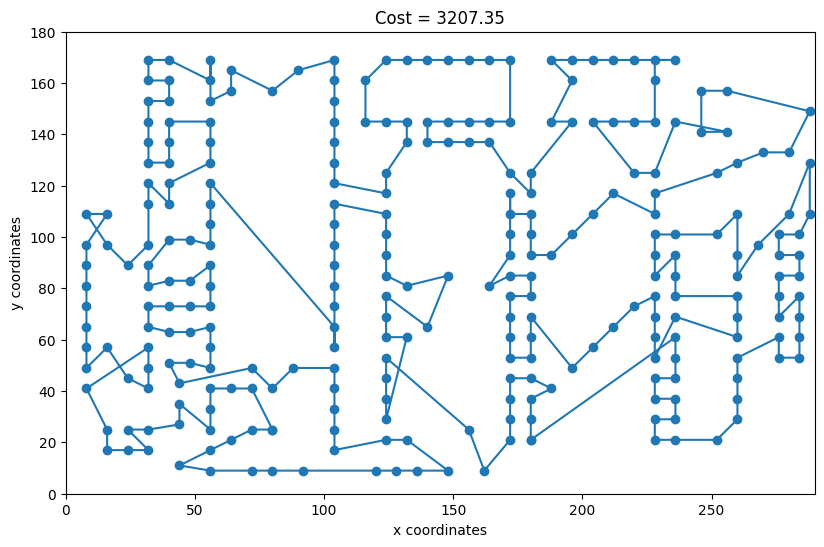

In [46]:
index1 = list(last_costs_best[0]).index(min(last_costs_best[0]))
uf.plot_configuration(configs_best[0, index1], coord_dict)

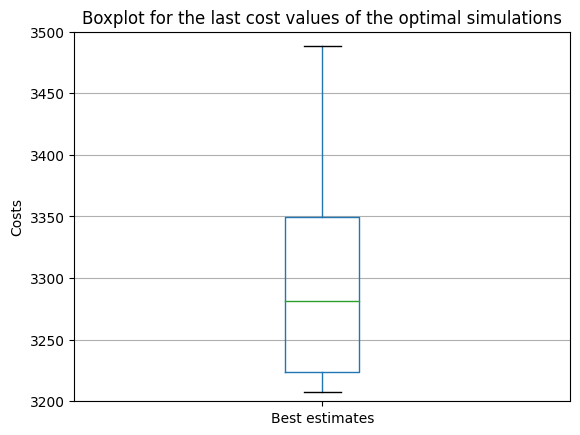

In [72]:
last_costs_best_df = pd.read_csv('last_costs_best_280.csv')
last_costs_best_df.columns = ['Best estimates']
last_costs_best_df.boxplot()

plt.grid(axis='x')
plt.ylim(3200, 3500)
plt.ylabel('Costs')
plt.title('Boxplot for the last cost values of the optimal simulations')
plt.show()

In [58]:
mean = np.mean(last_costs_best)
intervals = st.norm.interval(confidence=0.95, loc=mean, scale=np.std(last_costs_best))

print(f'The average lowest cost was: {round(mean, 3)} +- {round(intervals[1] - mean, 3)} (95% confidence)')

The average lowest cost was: 3301.564 +- 176.637 (95% confidence)


## Optimal configuration

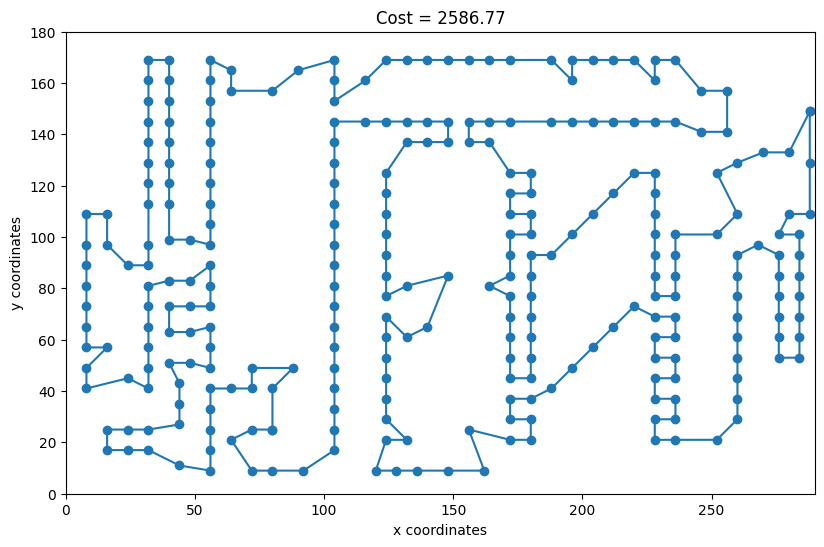

In [23]:
optimal_route = uf.read_optimal_route(r'TSP_problems\a280.opt.tour.txt')

uf.plot_configuration(optimal_route, coord_dict)